# Adversarial Learning for the function $V(x_1, x_2) = x_1 x_2 $ 

Starting at an initial point we perform one step of gradient descent by first try to minimize $V(x_1, x_2)$ and then to minimize $-V(x_1, x_2)$.
In each minimization we can either update both variables $x_1, x_2$ or update only $x_1$ when minimizing $V$ and update only $x_2$ when minimizing $-V$.

We start with the former and perform the algorith:
- start at initial point $x_{\text{init}}$, define training step $\alpha$ and number of epochs $n_\text{epochs}$
- for number of epochs $n_{\text{epochs}}$:
  - gradient is $dV = \nabla_{x}V = (x_2, x_1)$ 
  - first update variables by minimize $V(x_1, x_2)$ : $x \leftarrow x - \alpha dV$ 
  - second update variables by minimize $-V(x_1, x_2)$: $x \leftarrow x + \alpha dV$
  - store the next point $\left( x_1, x_2\right)$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def adversarial_gd_both_variables(x_init, alpha = 0.1, n_epochs = 100):
    
    # trajectory steps and intermediate steps
    trajectory = np.zeros((1+n_epochs, 2))
    intermediate_trajectory = np.zeros((1+n_epochs, 2))
    
    # initialize the starting point
    trajectory[0] = x_init
    intermediate_trajectory[0] = x_init
    x = x_init
    
    # apply adversarial GD for n_epochs
    for n in range(n_epochs):

        # first update by minimize V
        x = x - alpha*np.flip(x)
        
        # store the intermediate value
        intermediate_trajectory[n+1] = x
        
        # second update by minimize -V
        x = x + alpha*np.flip(x)

        # store the point
        trajectory[n+1] = x 
        
    return trajectory, intermediate_trajectory

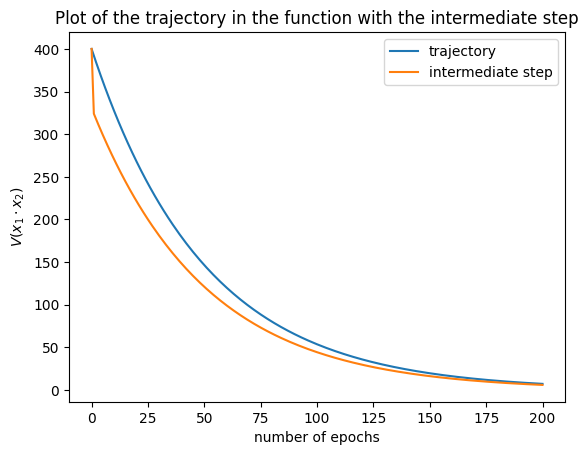

In [3]:
# plot the trajectory in 2-dim
trajectory, intermediate_trajectory = adversarial_gd_both_variables(x_init= [20, 20], alpha= 0.1, n_epochs=200)

plt.plot(trajectory[:,0]*trajectory[:,1], label = 'trajectory')
plt.plot(intermediate_trajectory[:,0]*intermediate_trajectory[:,1], label = 'intermediate step')
plt.xlabel('number of epochs')
plt.ylabel('$V(x_1 \\cdot x_2)$')
plt.title('Plot of the trajectory in the function with the intermediate step')
plt.legend()
plt.show()

In [4]:
# Define the function
def function(x, y):
    return x*y

def plot_3d(trajecory, initial_point, n_epochs):
    ''' 3-D plot the function and the input trajectory on the function starting at the initial point 
    '''
    # Generate grid points for the surface
    x = np.linspace(-initial_point[0], initial_point[0], 1000)
    y = np.linspace(-initial_point[1], initial_point[1], 1000)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    # Simulate a trajectory towards the minimum
    # Example trajectory: gradient descent path
    trajectory_x = trajecory[:, 0]  # x values
    trajectory_y = trajecory[:, 1]  # y values
    trajectory_z = function(trajectory_x, trajectory_y)  # corresponding z values

    # Plot the surface
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    # Plot the trajectory
    ax.plot(trajectory_x, trajectory_y, trajectory_z, 
            color='red', 
            # marker='o', 
            label='Trajectory'
            )
    
    # initial point
    ax.scatter(trajectory_x[0], trajectory_y[0], trajectory_z[0], 
            color='red', 
            marker='o', 
            label=f'Initial Point {tuple(initial_point)}'
            )  
    # final point  
    ax.scatter(trajectory_x[-1], trajectory_y[-1], trajectory_z[-1], 
            color='blue', 
            marker='x', 
            label=f'Final Point {(round(trajecory[-1, 0], 2), round(trajecory[-1, 0], 2))}'
            )      
    
    # actuall local minimum point
    ax.scatter(0, 0, 0, 
            color='green', 
            marker='*', 
            s = 300,
            label='Local Min (0, 0)'
            )        

    # Add labels and legend
    ax.set_title(f"3D Surface and Trajectory Towards the Minimum; epochs = {n_epochs}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()

    plt.show()

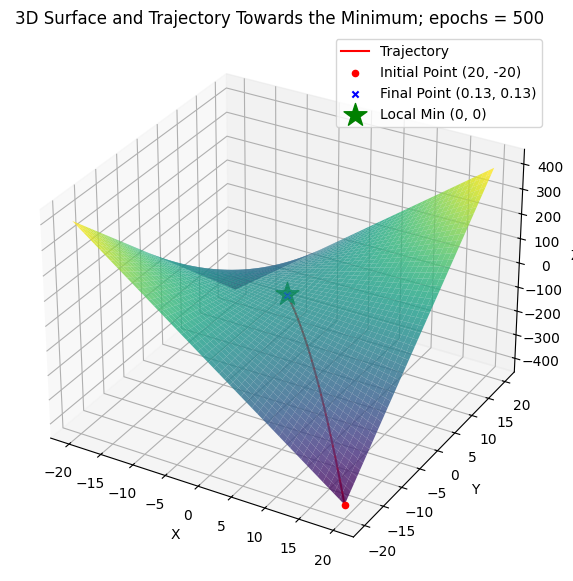

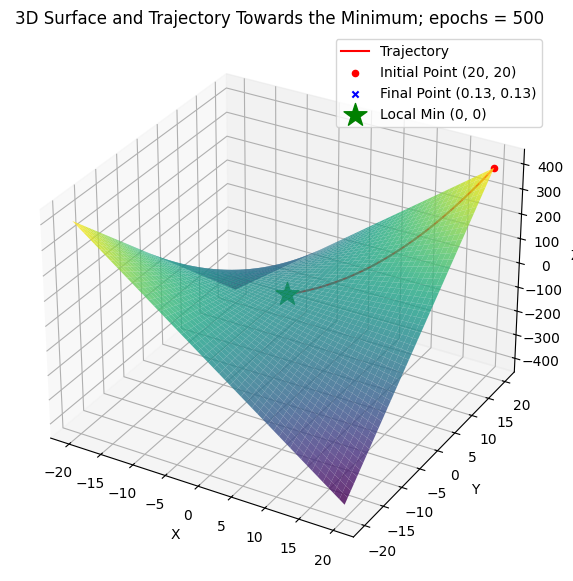

In [5]:
n_epochs = 500
x_init= [20, -20]
trajectory, intermediate_trajectory = adversarial_gd_both_variables(x_init, alpha= 0.1, n_epochs=n_epochs)
plot_3d(trajectory, initial_point = x_init, n_epochs=n_epochs)
x_init= [20, 20]
trajectory, intermediate_trajectory = adversarial_gd_both_variables(x_init, alpha= 0.1, n_epochs=n_epochs)
plot_3d(trajectory, initial_point = x_init, n_epochs=n_epochs)

Note that when we minimize $V$ and then $-V$ we do so by each time updating both variables $x_1, x_2$.  
In GAN however we first minimize the function w.r.t to the descriminator parameters only and then w.r.t. the generator.
So now at each minimization update only one of the variables and the training algorithm is:
- start at initial point $x_{\text{init}}$; define training step $\alpha$, number of epochs $n_{\text{epochs}}$
- for number of epochs $n_\text{epochs}:
  - gradient is $dV_{x1} = \nabla_{x_1}V = x_2$, and $dV_{x2} = \nabla_{x_2}V = x_1$ 
  - first update variable $x_1$ by minimize  $V(x_1, x_2)$ : $x_1 \leftarrow x_1 - \alpha dV = x_1 - \alpha x_2$ 
  - second update variable $x_2$ by minimize $-V(x_1, x_2)$: $x_2 \leftarrow x_2 + \alpha dV = x_2 - \alpha x_1$   
  - store the next point $\left( x_1, x_2 \right)$

In [10]:
def adversarial_gd_one_one_variable(x_init, alpha = 0.1, n_epochs = 100):
    
    # trajectory steps and intermediate steps
    trajectory = np.zeros((1+n_epochs, 2))
    intermediate_trajectory = np.zeros((1+n_epochs, 2))
    
    # initialize the starting point
    trajectory[0] = x_init
    intermediate_trajectory[0] = x_init
    x1, x2 = x_init
    
    # apply adversarial GD for n_epochs
    for n in range(n_epochs):

        # first update by minimize V
        x1 = x1 - alpha*x2
        
        # store the intermediate value
        intermediate_trajectory[n+1] = np.array([x1, x2])
        
        # second update by minimize -V
        x2 = x2 + alpha*x1

        # store the point
        trajectory[n+1] = np.array([x1, x2]) 
        
    return trajectory , intermediate_trajectory

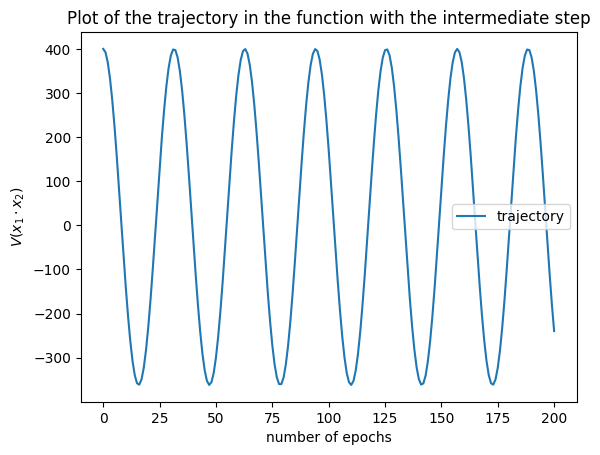

In [11]:
# plot the trajectory in 2-dim
trajectory, intermediate_trajectory = adversarial_gd_one_one_variable(x_init= [20, 20], alpha= 0.1, n_epochs=200)

plt.plot(trajectory[:,0]*trajectory[:,1], label = 'trajectory')
# plt.plot(intermediate_trajectory[:,0]*intermediate_trajectory[:,1], label = 'intermediate step')
plt.xlabel('number of epochs')
plt.ylabel('$V(x_1 \\cdot x_2)$')
plt.title('Plot of the trajectory in the function with the intermediate step')
plt.legend()
plt.show()

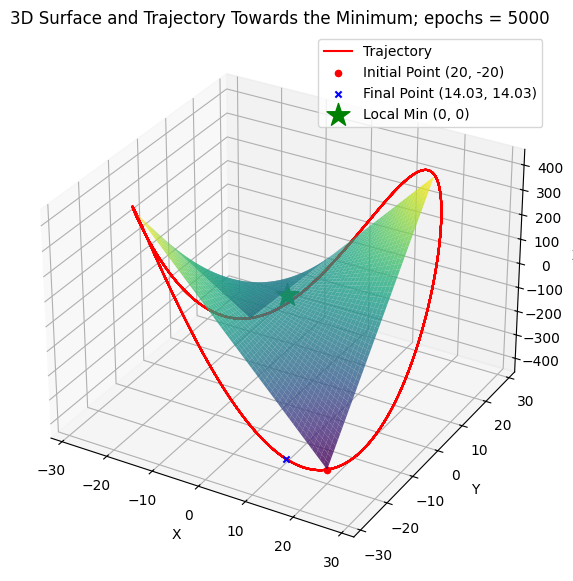

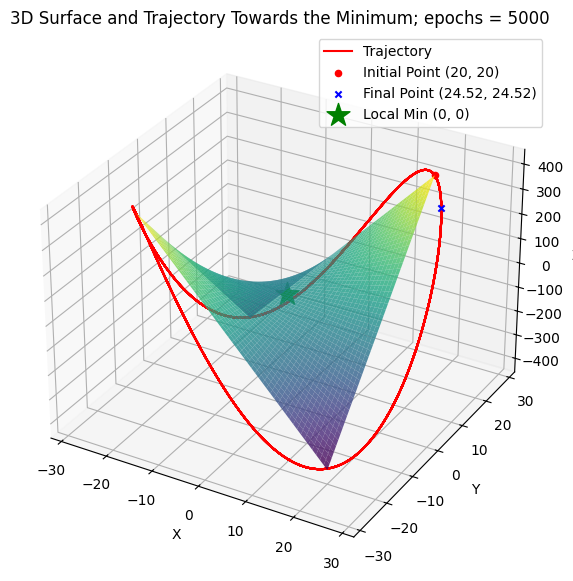

In [12]:
n_epochs = 5000
x_init= [20, -20]
trajectory, intermediate_trajectory = adversarial_gd_one_one_variable(x_init, alpha= 0.01, n_epochs=n_epochs)
plot_3d(trajectory, initial_point = x_init, n_epochs=n_epochs)
x_init= [20, 20]
trajectory, intermediate_trajectory = adversarial_gd_one_one_variable(x_init, alpha= 0.01, n_epochs=n_epochs)
plot_3d(trajectory, initial_point = x_init, n_epochs=n_epochs)

Now there is no convergion of the algorithm towards the local minimum. See [here](https://arxiv.org/pdf/1801.04406.pdf)